In [1]:
! pip install pyreadstat

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import pyreadstat

In [2]:
# Utilisez pyreadstat pour lire le fichier SAS
dataframe_sas, meta = pyreadstat.read_sas7bdat('data/base_finale_cible_2.sas7bdat')

# Afficher le DataFrame résultant
print(dataframe_sas)

            date cible_2     NUMTECPRS  Engagement_prorat CODNAF2  \
0       202201.0       0  9.100000e+02            1245.71   4772A   
1       202201.0       0  1.570800e+04           22453.26   4711B   
2       202201.0       0  3.075800e+04           12770.09   8623Z   
3       202201.0       0  6.949600e+04          114002.53   8623Z   
4       202201.0       0  8.736000e+04           12970.63   4789Z   
...          ...     ...           ...                ...     ...   
596047  202212.0       1  1.341477e+11              67.02   4759B   
596048  202212.0       1  1.341632e+11              36.49   8623Z   
596049  202212.0       1  1.342214e+11               3.43   8690F   
596050  202212.0       1  1.342678e+11            6957.06   6910Z   
596051  202212.0       1  1.343004e+11              59.77   8121Z   

                     SEC_DER COULEUR_PART_M COULEUR_PART_MM3_M   AGE  \
0       Comm détail non alim           Vert          Vert_Vert  64.0   
1           Comm détail ali

In [4]:
dataframe_sas.shape

(596052, 185)

In [5]:
dataframe_sas.columns.tolist()

['date',
 'cible_2',
 'NUMTECPRS',
 'Engagement_prorat',
 'CODNAF2',
 'SEC_DER',
 'COULEUR_PART_M',
 'COULEUR_PART_MM3_M',
 'AGE',
 'CODETAJUR',
 'CODTYPPRS',
 'LIBCSPCMP',
 'NBOPECAR',
 'NBOPECARGLISS_M12',
 'MNTOPECAR',
 'NBPMTCAR',
 'NBPMTCARGLISS_M12',
 'MNTPMTCAR',
 'NBRETCAR',
 'NBRETCARGLISS_M12',
 'MNTRETCAR',
 'NBECRCRD',
 'MNTECRCRD',
 'NBECRDBT',
 'MNTECRDBT',
 'NBVIRPONEMI',
 'NBVIRPONEMIGLISS_M12',
 'MNTVIRPONEMI',
 'NBCHQEMI',
 'NBCHQEMIGLISS_M12',
 'MNTCHQEMI',
 'NBPLV',
 'MNTPLV',
 'NBVIRPONRCP',
 'MNTVIRPONRCP',
 'NBVIRPEREMI',
 'MNTVIRPEREMI',
 'MNTTOTMVTAFF',
 'MNTTOTMVTAFFGLISS_M12',
 'MNTECSCPTEPA',
 'NBECRCRD_mm1',
 'MNTECRCRD_mm1',
 'NBECRDBT_mm1',
 'MNTECRDBT_mm1',
 'NBPLV_mm1',
 'MNTPLV_mm1',
 'MNTTOTMVTAFF_mm1',
 'MNTTOTMVTAFFGLISS_M12_mm1',
 'NBECRCRD_mm3',
 'MNTECRCRD_mm3',
 'NBECRDBT_mm3',
 'MNTECRDBT_mm3',
 'NBPLV_mm3',
 'MNTPLV_mm3',
 'MNTTOTMVTAFF_mm3',
 'MNTTOTMVTAFFGLISS_M12_mm3',
 'NBECRCRD_mm12',
 'MNTECRCRD_mm12',
 'NBECRDBT_mm12',
 'MNTECRDBT_mm12'

NUMTECPRS est la clé primaire.

In [6]:
dataframe_sas.NUMTECPRS

0         9.100000e+02
1         1.570800e+04
2         3.075800e+04
3         6.949600e+04
4         8.736000e+04
              ...     
596047    1.341477e+11
596048    1.341632e+11
596049    1.342214e+11
596050    1.342678e+11
596051    1.343004e+11
Name: NUMTECPRS, Length: 596052, dtype: float64

Le doublon (date,NUMTECPRS) est la clée primaire de la table on va vérifier qu'il n'y est pas de doublons.

In [8]:
# Vérifiez les duplications pour la combinaison (date, NUMTECPRS)
duplications_cle_primaire = dataframe_sas.duplicated(subset=['date', 'NUMTECPRS'])

# Affichez le nombre total de duplications pour la clé primaire
print(f'Nombre total de doublons pour la clé primaire : {duplications_cle_primaire.sum()}')

Nombre total de doublons pour la clé primaire : 0


Les clients sont identifiés avec la variable NUMTECPRS, on va chercher combien il y a de clients différents.

In [10]:
# Obtenez le nombre de clients différents
nombre_clients_differents = dataframe_sas['NUMTECPRS'].nunique()

# Affichez le nombre de clients différents
print(f'Nombre de clients différents : {nombre_clients_differents}')

Nombre de clients différents : 144411


In [16]:
# Obtenez une liste des variables quantitatives
list_variables_quantitatives = dataframe_sas.select_dtypes(include=['number']).columns.tolist()

# Affichez les listes de variables
print('Variables quantitatives :', list_variables_quantitatives)
len(list_variables_quantitatives)

Variables quantitatives : ['date', 'NUMTECPRS', 'Engagement_prorat', 'AGE', 'NBOPECAR', 'NBOPECARGLISS_M12', 'MNTOPECAR', 'NBPMTCAR', 'NBPMTCARGLISS_M12', 'MNTPMTCAR', 'NBRETCAR', 'NBRETCARGLISS_M12', 'MNTRETCAR', 'NBECRCRD', 'MNTECRCRD', 'NBECRDBT', 'MNTECRDBT', 'NBVIRPONEMI', 'NBVIRPONEMIGLISS_M12', 'MNTVIRPONEMI', 'NBCHQEMI', 'NBCHQEMIGLISS_M12', 'MNTCHQEMI', 'NBPLV', 'MNTPLV', 'NBVIRPONRCP', 'MNTVIRPONRCP', 'NBVIRPEREMI', 'MNTVIRPEREMI', 'MNTTOTMVTAFF', 'MNTTOTMVTAFFGLISS_M12', 'MNTECSCPTEPA', 'NBECRCRD_mm1', 'MNTECRCRD_mm1', 'NBECRDBT_mm1', 'MNTECRDBT_mm1', 'NBPLV_mm1', 'MNTPLV_mm1', 'MNTTOTMVTAFF_mm1', 'MNTTOTMVTAFFGLISS_M12_mm1', 'NBECRCRD_mm3', 'MNTECRCRD_mm3', 'NBECRDBT_mm3', 'MNTECRDBT_mm3', 'NBPLV_mm3', 'MNTPLV_mm3', 'MNTTOTMVTAFF_mm3', 'MNTTOTMVTAFFGLISS_M12_mm3', 'NBECRCRD_mm12', 'MNTECRCRD_mm12', 'NBECRDBT_mm12', 'MNTECRDBT_mm12', 'NBPLV_mm12', 'MNTPLV_mm12', 'MNTTOTMVTAFF_mm12', 'MNTTOTMVTAFFGLISS_M12_mm12', 'NBJ_ARR', 'IMPAYE', 'DEPASSEMENT', 'NBJ_ARR_mm1', 'NBJ_ARR_mm1

153

In [15]:
# Obtenez une liste des variables qualitatives
list_variables_qualitatives = dataframe_sas.select_dtypes(include=['object']).columns.tolist()

print('Variables qualitatives :', list_variables_qualitatives)
len(list_variables_qualitatives)

Variables qualitatives : ['cible_2', 'CODNAF2', 'SEC_DER', 'COULEUR_PART_M', 'COULEUR_PART_MM3_M', 'CODETAJUR', 'CODTYPPRS', 'LIBCSPCMP', 'Type_fdc_dm', 'cible_1', 'cible_3', 'CHR_USAGE_NDB_V1_4', 'CHR_USAGE_mm1', 'CHR_USAGE_mm3', 'CHR_USAGE_mm6', 'CODACVPRO', 'COULEUR_IRPRO', 'COULEUR_IRPRO_mm1', 'Degra_IRPRO_1pt_par_2m', 'Degra_IRPRO_2pt_par_2m', 'Degra_IRPRO_continue_3dm', 'Degra_IRPRO_mm1', 'Degra_IRPRO_mm3', 'Degra_couleur_IRPRO_mm1', 'INDDBLRLNPAR', 'INDRSKITDBDF', 'IRPRO_rouge_3dm', 'NDB_12dm', 'NDB_6dm', 'NDB_3dm', 'TOP_SCI', 'classe_finale_NDB']


32

In [14]:
dataframe_sas[list_variables_qualitatives].head(5)

,cible_2,CODNAF2,SEC_DER,COULEUR_PART_M,COULEUR_PART_MM3_M,CODETAJUR,CODTYPPRS,LIBCSPCMP,Type_fdc_dm,cible_1,...,Degra_IRPRO_mm3,Degra_couleur_IRPRO_mm1,INDDBLRLNPAR,INDRSKITDBDF,IRPRO_rouge_3dm,NDB_12dm,NDB_6dm,NDB_3dm,TOP_SCI,classe_finale_NDB
0,0,4772A,Comm détail non alim,Vert,Vert_Vert,1200,EI,COMMERCANTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
1,0,4711B,Comm détail alim,Vert,Vert_Vert,1200,EI,COMMERCANT,4- Aucun FDC spécifique,0,...,*,0,2,0,0,0,0,0,0,5
2,0,8623Z,Pro lib santé,Vert,Vert_Vert,1500,EI,CHIRURGIEN DENTISTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
3,0,8623Z,Pro lib santé,Vert,Vert_Vert,1500,EI,CHIRURGIEN DENTISTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
4,0,4789Z,Comm détail non alim,Vert,Vert_Vert,1200,EI,MARCHAND AMBULANT,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,2


In [17]:
# Obtenez les valeurs uniques de la variable cible_2
valeurs_uniques_cible_2 = dataframe_sas['cible_2'].unique()

# Affichez les valeurs uniques
print('Valeurs uniques de cible_2 :', valeurs_uniques_cible_2)

Valeurs uniques de cible_2 : ['0' '1']


On va étudier la corrélation entre la variable à expliquer et les variables explicatives.

In [18]:
# Obtenez un résumé statistique des variables quantitatives sélectionnées
resume_statistique = dataframe_sas[list_variables_quantitatives].describe()

# Affichez le résumé statistique
print("Résumé statistique des variables quantitatives sélectionnées :")
print(resume_statistique)

Résumé statistique des variables quantitatives sélectionnées :
                date     NUMTECPRS  Engagement_prorat            AGE  \
count  596052.000000  5.960520e+05       5.960520e+05  176853.000000   
mean   202206.426891  6.665445e+10       8.869935e+04      49.527314   
std         3.452379  3.897724e+10       3.248812e+05      12.314475   
min    202201.000000  9.100000e+02       1.736364e-01      18.000000   
25%    202203.000000  3.119075e+10       3.057423e+03      40.000000   
50%    202206.000000  6.443075e+10       2.060360e+04      50.000000   
75%    202209.000000  9.929997e+10       7.278822e+04      59.000000   
max    202212.000000  1.343995e+11       4.007512e+07      97.000000   

            NBOPECAR  NBOPECARGLISS_M12      MNTOPECAR       NBPMTCAR  \
count  596045.000000      596045.000000  596045.000000  596045.000000   
mean       12.742118         147.837393    1322.520693      12.307728   
std        20.768327         217.954029    2709.186824      20.170003

On étudit maintenant les valeurs manquantes des variables.

Analyse des variables données:

In [7]:
list_var=['COULEUR_PART_M','CRTOD_CMT_IND_0036','LIBCSPCMP','NBJDEB_NA','PRORGL_FILLER_NUM07','SEC_DER']

In [8]:
df_6_vars=dataframe_sas[list_var]

In [7]:
df_6_vars.head(10)

,COULEUR_PART_M,CRTOD_CMT_IND_0036,LIBCSPCMP,NBJDEB_NA,PRORGL_FILLER_NUM07,SEC_DER
0,Vert,0.0,COMMERCANTE,0.0,-1.0,Comm détail non alim
1,Vert,0.0,COMMERCANT,0.0,-1.0,Comm détail alim
2,Vert,0.0,CHIRURGIEN DENTISTE,0.0,-1.0,Pro lib santé
3,Vert,0.0,CHIRURGIEN DENTISTE,0.0,-1.0,Pro lib santé
4,Vert,0.0,MARCHAND AMBULANT,0.0,-1.0,Comm détail non alim
5,Vert,0.0,PHARMACIEN,11.0,-1.0,Pharmacie
6,Vert,0.0,ANTIQUAIRE,0.0,-1.0,Comm détail non alim
7,Orange,0.0,SANS PROFESSION,3.0,-1.0,Comm détail non alim
8,Orange,0.0,ARTISAN,0.0,-1.0,Comm détail non alim
9,Vert,0.0,ELECTRICIEN,0.0,-1.0,Artisan


In [12]:
import matplotlib.pyplot as plt


In [9]:
# Affiche le type de chaque variable
print("Types de variables :")
print(df_6_vars.dtypes)

Types de variables :
COULEUR_PART_M          object
CRTOD_CMT_IND_0036     float64
LIBCSPCMP               object
NBJDEB_NA              float64
PRORGL_FILLER_NUM07    float64
SEC_DER                 object
dtype: object


In [10]:
# Obtenez une liste des variables quantitatives
list_variables_quantitatives_6_vars = df_6_vars.select_dtypes(include=['number']).columns.tolist()

# Obtenez une liste des variables qualitatives
list_variables_qualitatives_6_vars = df_6_vars.select_dtypes(include=['object']).columns.tolist()

In [26]:
# Obtenez le nombre de valeurs manquantes par variable
valeurs_manquantes_par_variable_6 = df_6_vars.isnull().sum()

# Affichez le nombre de valeurs manquantes devant le nom de chaque variable
for variable, manquants in valeurs_manquantes_par_variable_6.items():
    print(f"{variable}: {manquants} valeurs manquantes")

COULEUR_PART_M: 0 valeurs manquantes
CRTOD_CMT_IND_0036: 0 valeurs manquantes
LIBCSPCMP: 0 valeurs manquantes
NBJDEB_NA: 0 valeurs manquantes
PRORGL_FILLER_NUM07: 0 valeurs manquantes
SEC_DER: 0 valeurs manquantes


In [29]:
import numpy as np

In [31]:
# Remplacez les valeurs 'NN' et 'NC' par NaN
df_6_vars.replace(['NN', 'NC'], np.nan, inplace=True)

# Calcule le nombre de valeurs manquantes par colonne
nb_valeurs_manquantes_par_colonne = df_6_vars.isnull().sum()

# Affiche le nombre de valeurs manquantes par colonne
print(nb_valeurs_manquantes_par_colonne)

C:\Users\id1990\AppData\Local\Temp\ipykernel_10684\2386969423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_vars.replace(['NN', 'NC'], np.nan, inplace=True)


COULEUR_PART_M         443252
CRTOD_CMT_IND_0036          0
LIBCSPCMP                   0
NBJDEB_NA                   0
PRORGL_FILLER_NUM07         0
SEC_DER                     0
dtype: int64


La variable COULEUR_PART_M contient 443252 valeurs manquantes on ne l'utilisera pas

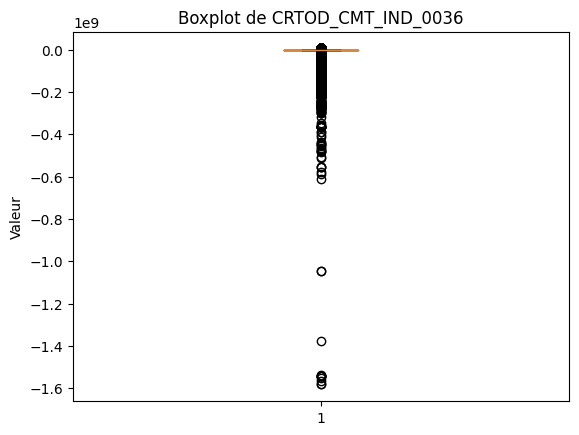

In [12]:
# Crée un boxplot pour la variable spécifique
plt.boxplot(df_6_vars['CRTOD_CMT_IND_0036'])
plt.title('Boxplot de CRTOD_CMT_IND_0036')
plt.ylabel('Valeur')

# Affiche le boxplot
plt.show()

In [17]:
max(df_6_vars['CRTOD_CMT_IND_0036'])

5000000.0

In [16]:
min(df_6_vars['CRTOD_CMT_IND_0036'])

-1581806625.0

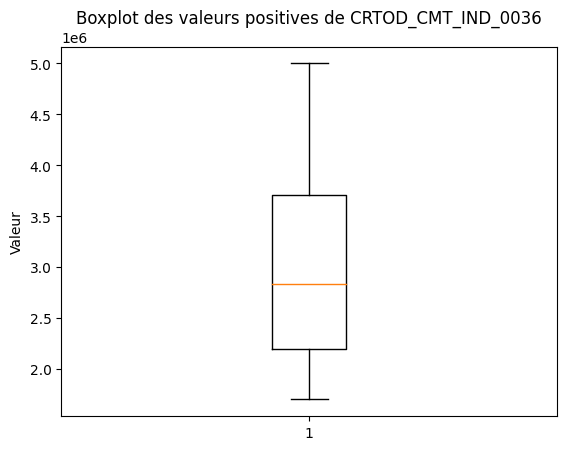

In [20]:
# Filtrer les valeurs positives
positive_values = df_6_vars['CRTOD_CMT_IND_0036'][df_6_vars['CRTOD_CMT_IND_0036'] > 0]

# Crée un boxplot pour les valeurs positives
plt.boxplot(positive_values)
plt.title('Boxplot des valeurs positives de CRTOD_CMT_IND_0036')
plt.ylabel('Valeur')

# Affiche le boxplot
plt.show()

In [21]:
# Calcule le pourcentage de valeurs négatives
percentage_negative = (df_6_vars['CRTOD_CMT_IND_0036'] < 0).mean() * 100

# Affiche le pourcentage de valeurs négatives
print(f"Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : {percentage_negative:.2f}%")

Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : 11.59%


In [22]:
# Calcule le pourcentage de valeurs négatives
percentage_negative = (df_6_vars['CRTOD_CMT_IND_0036'] == 0).mean() * 100

# Affiche le pourcentage de valeurs négatives
print(f"Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : {percentage_negative:.2f}%")

Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : 73.80%


Variables inutilisables car quasiment tous les montants sont négatifs ou nul (informations concentré).

On étudie le libéllé des profession var : LIBCSPCMP

In [24]:
# Comptez les occurrences de chaque catégorie
counts = df_6_vars['LIBCSPCMP'].value_counts()

print(counts)

                                    419753
CHIRURGIEN DENTISTE                  15014
ARTISANS SERVICES AUX PARTICULIE     10542
MEDECIN SPECIALISTE LIBERAL           9677
ARTISAN DU BATIMENT ET DES TRAVA      9031
                                     ...  
PROPRIETAIRE CHAMBRE D HOTES             1
CHAUFFEUR AMBASSADE                      1
NETTOYAGE INDUSTRIEL ET AU PARTI         1
MEDECIN LIBERAL ET SALARI                1
VENTE A DISTANCE EN AUTOENTREPRE         1
Name: LIBCSPCMP, Length: 7492, dtype: int64


In [26]:
dataframe_sas['LIBCSPCMP'].nunique()

7492

In [31]:
# Filtrer les libellés qui contiennent "LIBERAL"
filtered_data = df_6_vars[df_6_vars['LIBCSPCMP'].str.contains('MEDECIN')]

# Comptez les occurrences de chaque catégorie après le filtrage
counts = filtered_data['LIBCSPCMP'].value_counts()
print(counts)

MEDECIN SPECIALISTE LIBERAL        9677
MEDECIN GENERALISTE LIBERAL        5663
PSYCH... (NON MEDECIN)             2491
MEDECIN                            1942
MEDECIN GENERALISTE                1498
                                   ... 
MEDECIN ACUPUNCTEUR                   1
MEDECINE VASCULAIRE ANGIOLOGUE        1
MEDECIN INTERNE                       1
MEDECIN READAPTATION PHYSIQUE         1
THERAPEUTE EN MEDECINE CHINOISE       1
Name: LIBCSPCMP, Length: 155, dtype: int64


Etude secteur d'activité

In [9]:
print(df_6_vars['SEC_DER'].unique())
print(df_6_vars['SEC_DER'].nunique())

['Comm détail non alim' 'Comm détail alim' 'Pro lib santé' 'Pharmacie'
 'Artisan' 'Agriculture' 'OBSL' 'Pro lib hors santé' 'Divers' 'BTP' 'CHR'
 'Immobilier' 'industrie fabrication' 'Comm Gros non alim' 'transport'
 'S C I' 'Viticulture' 'Comm Gros alim' 'non renseignes']
19


In [10]:
# Obtenez le nombre d'observations par intitulé
observations_count = df_6_vars['SEC_DER'].value_counts()

# Affiche le résultat
print("Nombre d'observations par intitulé de SEC_DER :\n", observations_count)

Nombre d'observations par intitulé de SEC_DER :
 Comm détail non alim     89925
Pro lib santé            83179
Artisan                  59221
Pro lib hors santé       56465
S C I                    50240
CHR                      50238
transport                33591
Divers                   29753
Comm détail alim         29175
Immobilier               22442
industrie fabrication    20763
OBSL                     20295
Comm Gros non alim       16961
BTP                      10552
non renseignes            6996
Agriculture               5485
Pharmacie                 4351
Comm Gros alim            4093
Viticulture               2327
Name: SEC_DER, dtype: int64


In [13]:
# Créez un boxplot pour la variable SEC_DER
plt.boxplot(df_6_vars['SEC_DER'])
plt.title('Boxplot de la variable SEC_DER')
plt.ylabel('Valeur')

# Affiche le boxplot
plt.show()

In [ ]:
print(1)

la variables à 19 modalités on va devoir faire des regroupements.

In [61]:
# Obtenez le nombre de valeurs manquantes par variable
valeurs_manquantes_par_variable = dataframe_sas.isna().sum()

# Affichez le nombre de valeurs manquantes devant le nom de chaque variable
for variable, manquants in valeurs_manquantes_par_variable.items():
    print(f"{variable}: {manquants} valeurs manquantes")

date: 0 valeurs manquantes
cible_2: 0 valeurs manquantes
NUMTECPRS: 0 valeurs manquantes
Engagement_prorat: 0 valeurs manquantes
CODNAF2: 0 valeurs manquantes
SEC_DER: 0 valeurs manquantes
COULEUR_PART_M: 0 valeurs manquantes
COULEUR_PART_MM3_M: 0 valeurs manquantes
AGE: 419199 valeurs manquantes
CODETAJUR: 0 valeurs manquantes
CODTYPPRS: 0 valeurs manquantes
LIBCSPCMP: 0 valeurs manquantes
NBOPECAR: 7 valeurs manquantes
NBOPECARGLISS_M12: 7 valeurs manquantes
MNTOPECAR: 7 valeurs manquantes
NBPMTCAR: 7 valeurs manquantes
NBPMTCARGLISS_M12: 7 valeurs manquantes
MNTPMTCAR: 7 valeurs manquantes
NBRETCAR: 7 valeurs manquantes
NBRETCARGLISS_M12: 7 valeurs manquantes
MNTRETCAR: 7 valeurs manquantes
NBECRCRD: 7 valeurs manquantes
MNTECRCRD: 7 valeurs manquantes
NBECRDBT: 7 valeurs manquantes
MNTECRDBT: 7 valeurs manquantes
NBVIRPONEMI: 7 valeurs manquantes
NBVIRPONEMIGLISS_M12: 7 valeurs manquantes
MNTVIRPONEMI: 7 valeurs manquantes
NBCHQEMI: 7 valeurs manquantes
NBCHQEMIGLISS_M12: 7 valeurs

In [62]:
# Comptez le nombre de lignes avec au moins une valeur manquante
nombre_lignes_avec_manquants = dataframe_sas.isna().any(axis=1).sum()

# Affichez le nombre de lignes avec au moins une valeur manquante
print("Nombre de lignes avec au moins une valeur manquante :", nombre_lignes_avec_manquants)

Nombre de lignes avec au moins une valeur manquante : 523142


Nous allons maintenant étudier le lien entre la variable explicatives 'cible_2' et les variables à expliquer quantitatives.

supprimer variable MPJ_ qui prends toujours 0.

In [20]:
# Trouver la variable avec le plus de valeurs manquantes
variable_max_valeurs_manquantes = dataframe_sas.isnull().sum().idxmax()

print("La variable avec le plus de valeurs manquantes est :", variable_max_valeurs_manquantes)

La variable avec le plus de valeurs manquantes est : AGE


On cherche la corréaltion ente la variable cible_2 et les variables quantitatives

In [13]:
import pandas as pd
from scipy.stats import kruskal

# Supposons que votre DataFrame s'appelle dataframe_sas
# et que vous avez déjà obtenu la liste des variables quantitatives

# Liste des variables quantitatives
list_variables_quantitatives = dataframe_sas.select_dtypes(include=['number']).columns.tolist()

# Création d'un DataFrame pour stocker les résultats
resultats_kruskall_wallis = pd.DataFrame(columns=['Variable', 'Stat. test Kruskall-Wallis', 'p-valeur'])

# Calcul des statistiques Kruskall-Wallis pour chaque variable
for variable in list_variables_quantitatives:
    # Exclure les groupes où toutes les valeurs sont identiques
    groupes = [dataframe_sas[variable][dataframe_sas['cible_2'] == groupe].dropna() for groupe in dataframe_sas['cible_2'].unique() if len(set(dataframe_sas[variable][dataframe_sas['cible_2'] == groupe])) > 1]
    
    if len(groupes) > 1:  # Assurez-vous qu'il y a au moins deux groupes
        stat, p_value = kruskal(*groupes)

        # Ajout des résultats au DataFrame
        resultats_kruskall_wallis = pd.concat([resultats_kruskall_wallis, pd.DataFrame({
            'Variable': [variable],
            'Stat. test Kruskall-Wallis': [stat],
            'p-valeur': [p_value]
        })], ignore_index=True)

# Tri du DataFrame par p-valeur
resultats_kruskall_wallis = resultats_kruskall_wallis.sort_values(by='Stat. test Kruskall-Wallis', ascending=False)

# Affichage du DataFrame
print(resultats_kruskall_wallis)


               Variable  Stat. test Kruskall-Wallis  p-valeur
57          DEPASSEMENT                23351.717745  0.000000
80            NBJDEB_NA                23266.498384  0.000000
64      DEPASSEMENT_6dm                22690.400633  0.000000
77             NBJDEPDP                22414.087526  0.000000
65     DEPASSEMENT_12dm                21367.063038  0.000000
..                  ...                         ...       ...
82   CRTOD_CMT_IND_0036                    3.441486  0.063578
75        NB_RESTRU_6dm                    3.197428  0.073754
70            NB_RESTRU                    2.196790  0.138299
1             NUMTECPRS                    1.449456  0.228615
149   CATTCEUR_abs_mm12                    0.123231  0.725556

[152 rows x 3 columns]


In [14]:
# Sélectionner les 10 premières lignes
top_10_p_values = resultats_kruskall_wallis.head(20)

# Affichage du DataFrame des 10 plus petites p-valeurs
print(top_10_p_values)

                 Variable  Stat. test Kruskall-Wallis  p-valeur
57            DEPASSEMENT                23351.717745       0.0
80              NBJDEB_NA                23266.498384       0.0
64        DEPASSEMENT_6dm                22690.400633       0.0
77               NBJDEPDP                22414.087526       0.0
65       DEPASSEMENT_12dm                21367.063038       0.0
63        DEPASSEMENT_3dm                21114.424497       0.0
95        NBJDEB_IND_0015                16600.654374       0.0
68           NBJ_ARR_12dm                16336.328006       0.0
92  NB_MOIS_AVEC_ARR_12dm                16138.269317       0.0
85          NBJDEB_NA_mm3                15352.412003       0.0
81         CRTOC_IND_0164                14742.347946       0.0
67            NBJ_ARR_6dm                14255.889659       0.0
96        LIGCRE_IND_0009                14214.765503       0.0
99    LIGCRE_IND_0009_mm3                11864.492846       0.0
86     CRTOC_IND_0164_mm3               

On étudit la corrélation entre la variable cible et les variables qualitatives

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

# Supposons que votre DataFrame s'appelle dataframe_sas
# et que vous avez déjà obtenu la liste des variables qualitatives

# Variable cible
cible = 'cible_2'

# Liste des variables qualitatives
list_variables_qualitatives = dataframe_sas.select_dtypes(include=['object']).columns.tolist()

# Création d'un DataFrame pour stocker les résultats
resultats_tests_qualitatifs = pd.DataFrame(columns=['Variable', 'Stat. du y2', 'p-valeur', 'V de Cramer', 'T de Tschupro'])

# Calcul des statistiques pour chaque variable qualitative
for variable in list_variables_qualitatives:
    if variable != cible:
        contingency_table = pd.crosstab(dataframe_sas[cible], dataframe_sas[variable])
        
        # Test du chi2_contingency
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Calcul du V de Cramer
        n = contingency_table.sum().sum()
        r, c = contingency_table.shape
        v_cramer = (chi2 / (n * (min(r, c) - 1)))**0.5
        
        # Calcul du T de Tschupro
        k1 = len(dataframe_sas[variable].unique())
        k2 = len(dataframe_sas[cible].unique())
        t_tschupro_max = ((min(k1 - 1, k2 - 1) / max(k1 - 1, k2 - 1))**(1/4))
        t_tschupro = (chi2 / (n * (k1 - 1) * (k2 - 1))**0.5)
        
        # Normalisation de T de Tschupro entre [1, T_max]
        t_tschupro_normalized = 1 + (t_tschupro_max - 1) * t_tschupro
        
        # Ajout des résultats au DataFrame
        resultats_tests_qualitatifs = pd.concat([resultats_tests_qualitatifs, pd.DataFrame({
            'Variable': [variable],
            'Stat. du y2': [chi2],
            'p-valeur': [p_value],
            'V de Cramer': [v_cramer],
            'T de Tschupro': [t_tschupro_normalized]
        })], ignore_index=True)

# Tri du DataFrame par V de Cramer du plus grand au plus petit
resultats_tests_qualitatifs = resultats_tests_qualitatifs.sort_values(by='V de Cramer')

# Affichage du DataFrame
print(resultats_tests_qualitatifs)


                    Variable    Stat. du y2       p-valeur  V de Cramer  \
0                    cible_2  596017.182129   0.000000e+00     0.999971   
29                   NDB_3dm    2060.166875   0.000000e+00     0.058791   
28                   NDB_6dm    3096.527435   0.000000e+00     0.072077   
27                  NDB_12dm    3272.572148   0.000000e+00     0.074097   
26           IRPRO_rouge_3dm   18088.258891   0.000000e+00     0.174203   
25              INDRSKITDBDF    1985.274665   0.000000e+00     0.057712   
23   Degra_couleur_IRPRO_mm1    2980.927329   0.000000e+00     0.070719   
22           Degra_IRPRO_mm3    6848.604276   0.000000e+00     0.107191   
21           Degra_IRPRO_mm1    4625.923331   0.000000e+00     0.088096   
20  Degra_IRPRO_continue_3dm    2916.762278   0.000000e+00     0.069953   
17         COULEUR_IRPRO_mm1   26960.665026   0.000000e+00     0.212678   
16             COULEUR_IRPRO   31834.659196   0.000000e+00     0.231104   
14             CHR_USAGE_